In [1]:
from pprint import pprint as pp
from typing import Dict, List, Tuple

import random

# Building Knowledge Graph

## Extract Data

In [2]:
import csv

In [3]:
def get_data_from_csv(filepath: str):
    data = []
    with open(filepath) as file:
        next(file)
        rows = csv.reader(file, delimiter=",")
        for row in rows:
            num,kanji,radicals,meanings,theme,subtheme = row
            radicals = radicals.split(':')
            meanings = meanings.split(':')
            data.append({
                'kanji': kanji,
                'radicals': radicals,
                'meanings': meanings,
                'theme': theme,
                'subtheme': subtheme,
            })
    return data

In [38]:
data = get_data_from_csv(filepath="s7_kanji_total_clean.csv")
pp(data[:2])

[{'kanji': '亜',
  'meanings': ['Asia', 'rank next', 'come after', '-ous'],
  'radicals': ['｜', '口'],
  'subtheme': '',
  'theme': ''},
 {'kanji': '哀',
  'meanings': ['sadness or pity'],
  'radicals': ['亠', '口', '衣'],
  'subtheme': 'Emotions',
  'theme': 'Emotions_and_Senses'}]


## Get List of Nodes

In [2]:
class KanjigenNode:
    def __init__(self, name: str, dtype: str):
        self.name = name
        self.dtype = dtype
        
        mtc = {}
        mtc['kanji']   = 'red'
        mtc['radical'] = 'orange'
        mtc['meaning'] = 'yellow'
        
        self.color = mtc[dtype]

    def __repr__(self):
        return self.name + '-' + self.dtype
    
    def __str__(self):
        return self.name

In [1]:
def get_list_node(data):
    list_kanji, list_radical, list_meaning, list_theme, list_subtheme = set(), set(), set(), set(), set()

    for d in data:
        list_kanji    |= set(d['kanji'])
        list_radical  |= set(d['radicals'])
        list_meaning  |= set(d['meanings'])
        list_theme.add(d['theme'])
        list_subtheme.add(d['subtheme'])

    list_radical.remove(''), list_theme.remove(''), list_subtheme.remove('')

    list_node = []
    list_node += [KanjigenNode(k, "kanji")       for k in list_kanji]
    list_node += [KanjigenNode(r, "radical")     for r in list_radical]
    list_node += [KanjigenNode(m, "meaning")     for m in list_meaning]
#     list_node += [KanjigenNode(t, "theme")     for t in list_theme]
#     list_node += [KanjigenNode(s, "subtheme")  for s in list_subtheme]

    return list_node

In [7]:
list_node = get_list_node(data)
print(list_node[:10])

[萎-kanji, 皮-kanji, 過-kanji, 押-kanji, 削-kanji, 模-kanji, 才-kanji, 壮-kanji, 煎-kanji, 罷-kanji]


### Helper

In [8]:
def get_node(list_node, name, dtype):
    list_node_found = list(filter(lambda node: node.name == name and node.dtype == dtype, list_node))
    if len(list_node_found) > 0:
        return list_node_found[0]
    return None

## Get List of Edge

In [9]:
def get_list_edge(data, list_node):
    list_edge = []
    
    for d in data:
        node_kanji = get_node(list_node, d['kanji'], 'kanji')
            
        for radical in d['radicals']:
            node_radical = get_node(list_node, radical, 'radical')
            if node_radical != None:
                list_edge += [(node_kanji, node_radical)]
            
        for meaning in d['meanings']:
            node_meaning = get_node(list_node, meaning)
            list_edge += [(node_kanji, node_meaning)]
        

    return list_edge

In [10]:
list_edge = get_list_edge(data, list_node)
print(list_edge)

[(亜-kanji, ｜-radical), (亜-kanji, 口-radical), (哀-kanji, 亠-radical), (哀-kanji, 口-radical), (哀-kanji, 衣-radical), (挨-kanji, 厶-radical), (挨-kanji, 矢-radical), (挨-kanji, 扌-radical), (愛-kanji, 冖-radical), (愛-kanji, 夂-radical), (愛-kanji, 心-radical), (愛-kanji, 爪-radical), (曖-kanji, 冖-radical), (曖-kanji, 夂-radical), (曖-kanji, 心-radical), (曖-kanji, 日-radical), (曖-kanji, 爪-radical), (悪-kanji, ｜-radical), (悪-kanji, 口-radical), (悪-kanji, 心-radical), (握-kanji, 厶-radical), (握-kanji, 土-radical), (握-kanji, 尸-radical), (握-kanji, 至-radical), (握-kanji, 扌-radical), (圧-kanji, 厂-radical), (圧-kanji, 土-radical), (扱-kanji, 扌-radical), (扱-kanji, 及-radical), (宛-kanji, 卩-radical), (宛-kanji, 夕-radical), (宛-kanji, 宀-radical), (嵐-kanji, 山-radical), (嵐-kanji, 風-radical), (安-kanji, 女-radical), (安-kanji, 宀-radical), (案-kanji, 女-radical), (案-kanji, 宀-radical), (案-kanji, 木-radical), (暗-kanji, 日-radical), (暗-kanji, 立-radical), (暗-kanji, 音-radical), (以-kanji, ｜-radical), (以-kanji, 丶-radical), (以-kanji, 人-radical), (衣-kanji,

## Graph

In [11]:
import networkx as nx

In [12]:
G = nx.Graph()

In [13]:
G.add_nodes_from(list_node)
list(G.nodes())[:10]

[萎-kanji,
 皮-kanji,
 過-kanji,
 押-kanji,
 削-kanji,
 模-kanji,
 才-kanji,
 壮-kanji,
 煎-kanji,
 罷-kanji]

In [14]:
G.add_edges_from(list_edge)
list(G.edges())[:10]

[(萎-kanji, 女-radical),
 (萎-kanji, 禾-radical),
 (萎-kanji, 艹-radical),
 (皮-kanji, 又-radical),
 (過-kanji, 冂-radical),
 (過-kanji, 口-radical),
 (過-kanji, 辶-radical),
 (押-kanji, ｜-radical),
 (押-kanji, 日-radical),
 (押-kanji, 田-radical)]

## Visualization

In [15]:
import matplotlib
import matplotlib.pyplot as plt

### Install Font

In [16]:
import matplotlib.font_manager as fm

# Reference: https://albertauyeung.github.io/2020/03/15/matplotlib-cjk-fonts.html
[f for f in fm.fontManager.ttflist if 'CJK JP' in f.name]

[<Font 'Noto Serif CJK JP' (NotoSerifCJK-Regular.ttc) normal normal 400 normal>,
 <Font 'Noto Sans CJK JP' (NotoSansCJK-Bold.ttc) normal normal 700 normal>,
 <Font 'Noto Serif CJK JP' (NotoSerifCJK-Bold.ttc) normal normal 700 normal>,
 <Font 'Noto Sans CJK JP' (NotoSansCJK-Regular.ttc) normal normal 400 normal>]

In [17]:
fname = "Noto Serif CJK JP"

In [18]:
def visualize_graph(Graph: nx.Graph, figsize: tuple=(5,5), color_map: List[str]=None) -> None:
    if color_map == None:
        color_map = [n.color for n in Graph]  
    else:
        color_map = color_map
    
    plt.figure(1,figsize=figsize) 
    nx.draw_kamada_kawai(Graph, node_color=color_map, with_labels=True, node_size=1000, font_size=20,font_family=fname)
    plt.show()

### Sample Visualization

In [19]:
def get_sg_kanji_with() -> nx.Graph:
    sg = nx.Graph()
    p = get_node(list_node, '痘', 'kanji')
    radical_p = [n for n in G.neighbors(p)]
    sg.add_nodes_from(radical_p + [p])
    sg.add_edges_from([(p, rp) for rp in radical_p])
    return sg

In [42]:
sg = dict() # sample_graph
sg['full_graph'] = G
sg['sample_nodes'] = lambda size: G.subgraph(random.sample(G.nodes, size))
sg['kanji_plus_radical_neighbor'] = get_sg_kanji_with()

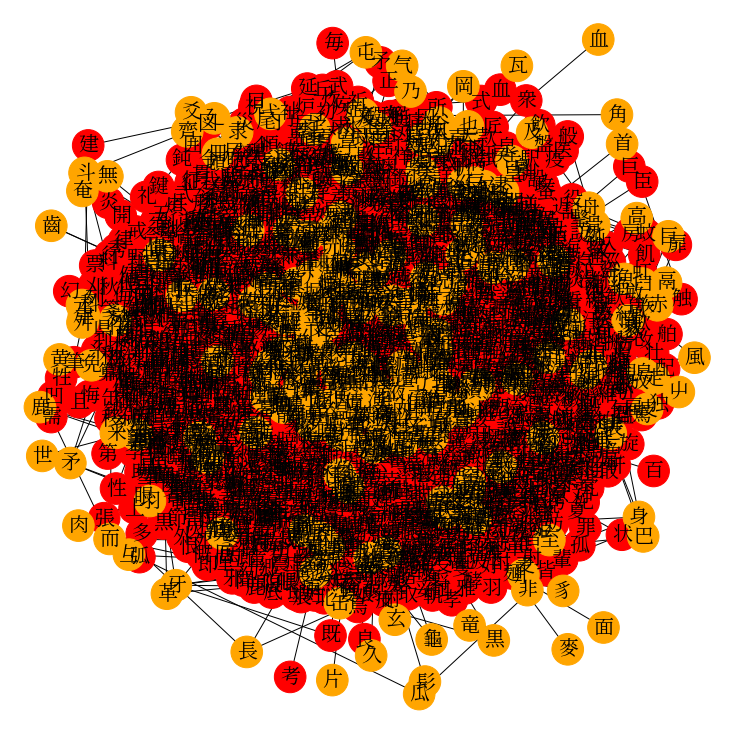

In [41]:
visualize_graph(Graph=sg['full_graph'], figsize=(10,10))

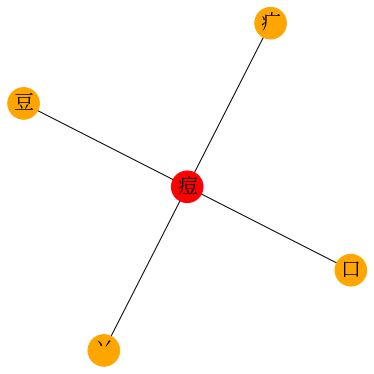

In [22]:
visualize_graph(Graph=sg['kanji_plus_radical_neighbor'], figsize=(5,5))

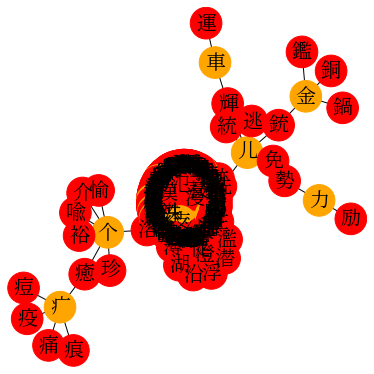

In [58]:
visualize_graph(Graph=sg['sample_nodes'](180), figsize=(5,5))

# Querying Knowledge Graph

## Exploratory Data Analysis

In [24]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2365
Number of edges: 6753
Average degree:   5.7108


In [25]:
# https://networkx.org/documentation/stable/reference/algorithms/component.html

print('number of connected components: ', nx.number_connected_components(G))

# To create the induced subgraph of each component use:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

number of connected components:  84


In [26]:
# https://networkx.org/documentation/stable/reference/algorithms/isolates.html
# EDA + Preprocessing: Removing Isolated Nodes

print('number of isolated: ', nx.number_of_isolates(G))


G.remove_nodes_from(list(nx.isolates(G)))

number of isolated:  83


In [27]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2282
Number of edges: 6753
Average degree:   5.9185


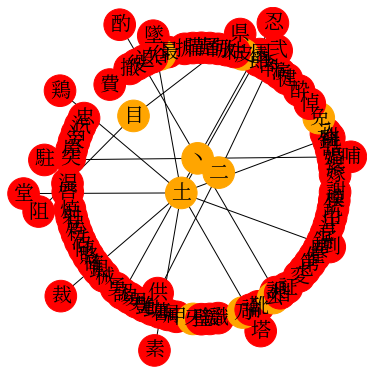

In [28]:
visualize_graph(Graph=G.subgraph(random.sample(G.nodes, 100)), figsize=(5,5))

## Brute Force Algorithm

In [133]:
kin = get_node(list_node, '怨', 'kanji')
kout = get_node(list_node, '浦', 'kanji')

result_shortest_path = nx.shortest_path(G, source=kin, target=kout)
print(result_shortest_path)

[怨-kanji, 心-radical, 恐-kanji, 丶-radical, 浦-kanji]


In [63]:
MO_raw = ['怨','姻','桜']
MD_raw = ['浦','奥','媛']

MO = [get_node(list_node, o, 'kanji') for o in MO_raw]
MD = [get_node(list_node, o, 'kanji') for o in MD_raw]

In [128]:
def generate_graph(nodes: List[KanjigenNode]) -> nx.Graph:
    R = nx.Graph()
    R.add_nodes_from(nodes)
    R.add_edges_from(nx.utils.pairwise(nodes))
    return R

In [146]:
def find_path_bf(MO: List[KanjigenNode], MD: List[KanjigenNode]) -> nx.Graph:
    
    result = []
    
    for kin in MO:
        for kout in MD:
            sp_raw = nx.shortest_path(G, source=kin, target=kout, method='dijkstra')
            sp_graph = generate_graph(sp_raw)
            
            result.append(sp_graph)
    
    
    return nx.compose_all(result)        

In [147]:
result = find_path_bf(MO, MD)
result.nodes()

NodeView((怨-kanji, 心-radical, 恐-kanji, 丶-radical, 浦-kanji, 愚-kanji, 冂-radical, 奥-kanji, 隠-kanji, 丿-radical, 媛-kanji, 姻-kanji, 大-radical, 挟-kanji, 女-radical, 桜-kanji, 木-radical, 機-kanji, 柿-kanji))

In [148]:
def get_node_color_result(kinputs, koutputs, union_result):
    color_map = []
    for n in union_result:
        if n.name in kinputs:
            color_map.append("green")
        elif n.name in koutputs:
            color_map.append("blue")
        else:
            color_map.append(n.color)
    return color_map

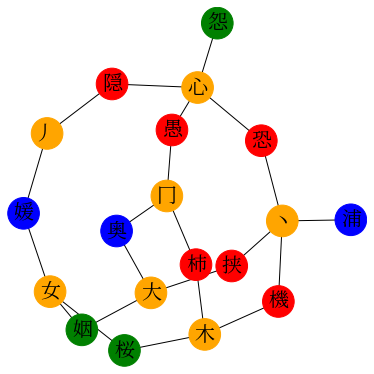

In [127]:
visualize_graph(Graph=result, color_map=get_node_color_result(MO_raw, MD_raw, result))

#  Heuristic

In [153]:
def find_path_heuristic(MO: List[KanjigenNode], MD: List[KanjigenNode], dist_func: 'function(o,d)') -> nx.Graph:
    
    result = []
    
    for kin in MO:
        for kout in MD:
            sp_raw = nx.astar_path(G, source=kin, target=kout, heuristic=dist_func)
            sp_graph = generate_graph(sp_raw)
            
            result.append(sp_graph)
    
    
    return nx.compose_all(result)        

In [ ]:
def dist_func(orig: KanjigenNode, dest: KanjigenNode) -> float:
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

## Evaluation

In [37]:
# https://networkx.org/documentation/stable/reference/algorithms/similarity.html